# 一、背景概览

## 1、实验背景

为了加强店铺心智以及弱化商品的马太效应，通过强化订阅功能：  

  + 增加用户粘性  
  + 缩短新品成长周期  

从而为平台创造更高的收益。页面改版如下：


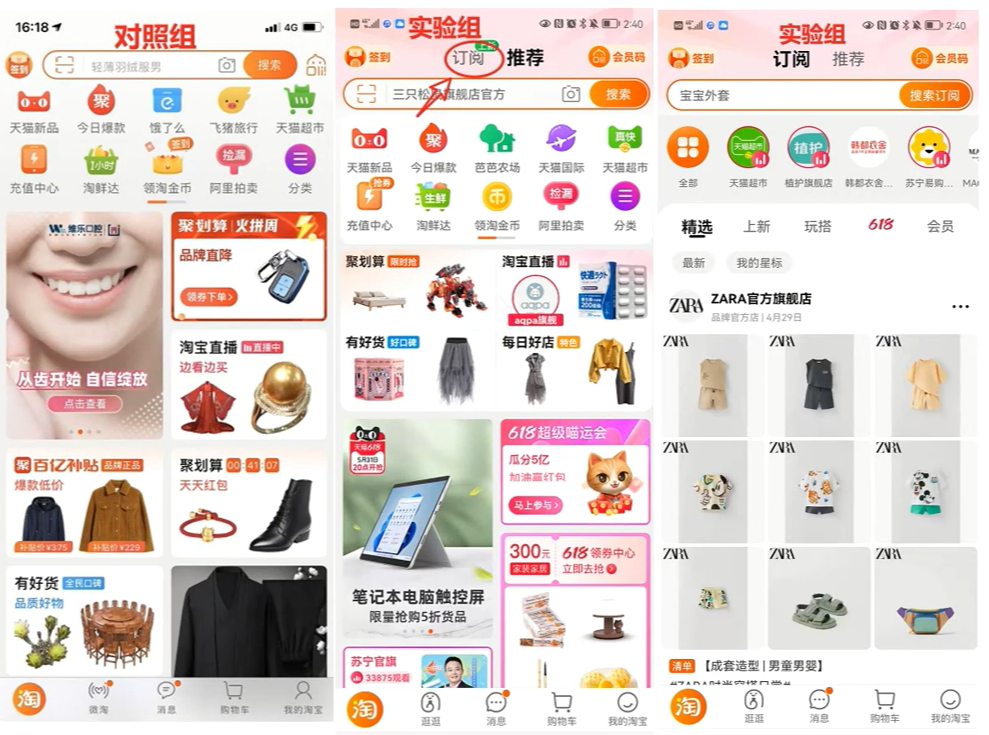

### 主要改动点有：

  + 在首页搜索框上方加入“订阅”标签，点击订阅标签，显示大多数是用户已订阅店铺的热销商品、上新商品，少数是推荐店铺的热销商品，增加客户关注店铺商品的曝光率
  + 在首页排版格式上，将“签到”、“订阅”、“会员码”显示在一行，方便用户形成下意识点击“订阅”


### 背景调研：
+ 改动背后的原因：主要改动是区分营销场和内容场，根本原因是让商家更高效地专注于私域营销，而对用户来说内容不会被营销所打扰，体验感上升。

- 【订阅】为了强化营销，也有一些细致化的改变。更注重对新品发售和会员身份的突出。比如上新会有绿色标识，上新后用户点击可直接转至商品详情页，对比之前【微淘】，则是点击内容-进入店铺-找到商品-进入详情页，用户的下单路径更短。店铺内容在右上角会标记会员身份，加强店铺会员的心智

### 改版后预计：

  + 改版后，平台成交GMV增长
  + 改版后，平台支付uv转化率增长  
  

## 2、实验信息

### 测试单元： 

  + 测试粒度：用户ID，限制登录app的用户，因为需要满足独立性，每个用户在本次实验中只能看到一种页面样式，如果以页面为粒度，同一个用户一会儿登入可以看到订阅、一会儿又看不到，不满足独立性。  
  + 用户范围：访问首页的用户。  

### 实验周期：  

  + AA实验：2021-04-11 ~ 2021-04-17  
  + AB实验：2021-04-18 ~ 2021-04-24

### 实验分流：

实验通过线上系统分流

### 3、实验目标

本次AB实验的主要目标：本次AB实验的主要目标：累计人均UV价值（总GMV/总访问人数）、累计人均支付转化率。预计累计人均UV价值可显著提升0.2%。



  + 目标指标：平台总GMV
  
  + 驱动指标：累计人均UV价值（总GMV/总访问人数）、累计人均支付转化率
  
  + 护栏指标：页面成功加载率，加载时长

本次实验选取累计人均GMV（UV价值）作为核心指标



# 二、实验分析与结论

## 1、实验结论

#### AA测试结果

+ 去异常：成交金额大于1万，定义为异常用户，将这些用户的金额抹平，超过1万的客户就定在1万元


+ 第一类错误：实验分流、累计人均支付转化率、累计人均gmv（去异常）的第一类错误在5%左右，符合预期。

+ 波动评估：实验组和对照组的分流、累计人均支付转化率、累计人均gmv（去异常）均无显著差异，aa测试成立，可以进行ab测试

#### AB测试结果

+ 实验分流通过

+ 指标显著性：累计人均UV价值(总GMV/总访问人数）提升1.65元（相对提升0.3%）不显著、累计人均支付转化率提升0.1%（相对提升0.2%)不显著。

+ 趋势性分析：实验上线后，日人均uv价值从第5天起有正向趋势，日人均支付转化率无变化

+ 建议：加长实验周期，再持续观察一周

#  2、AA校验

#### 第一类错误

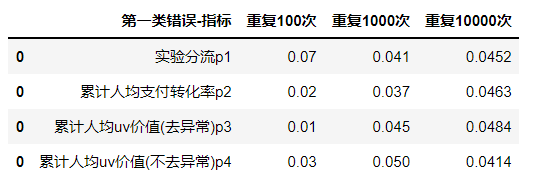

#### 用户分流

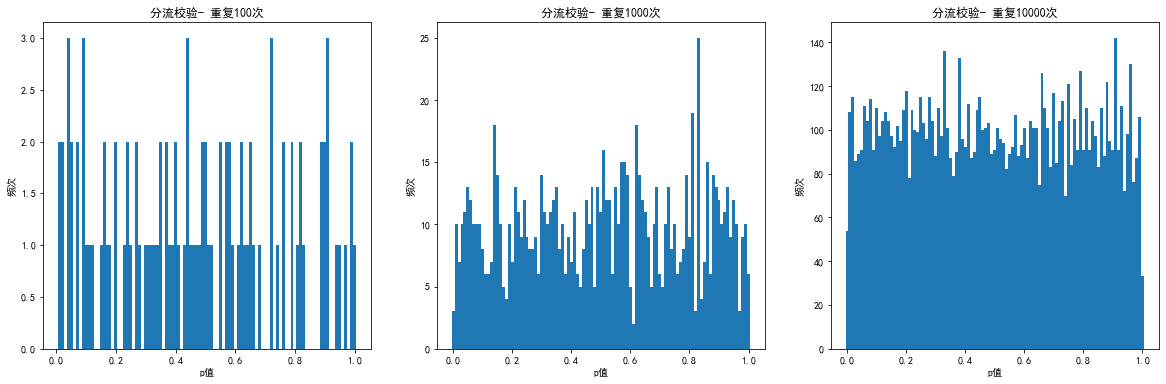

#### 转化率

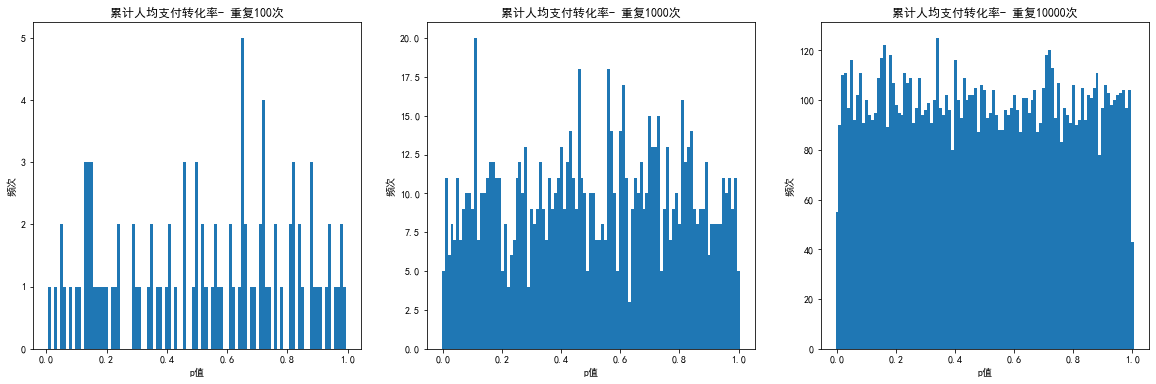

#### 人均uv价值（去异常)

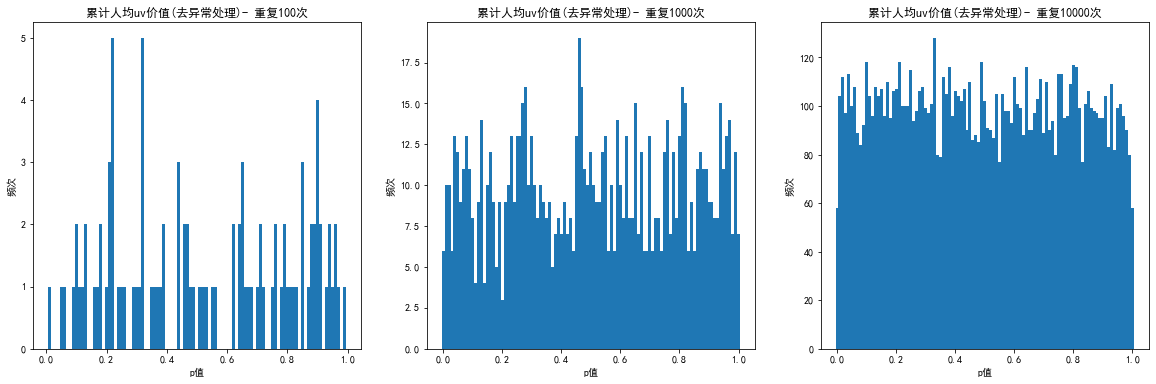

####  人均uv价值（未去异常)

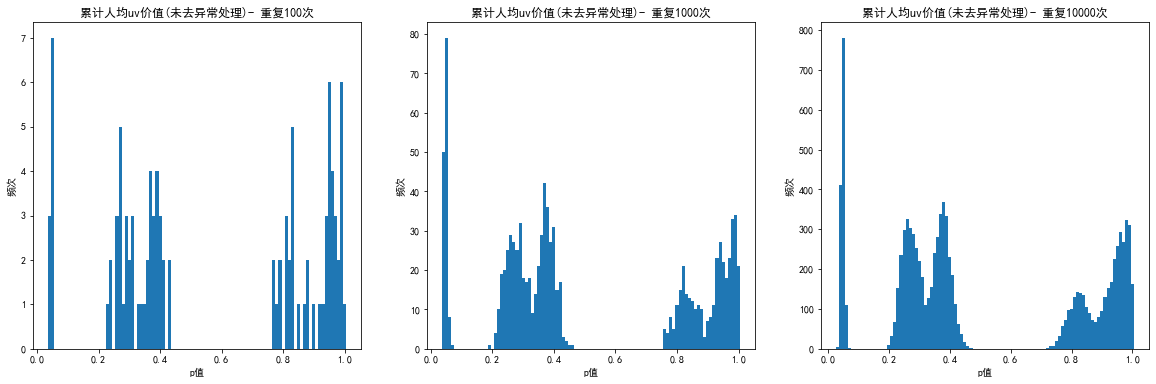

#### 波动评估

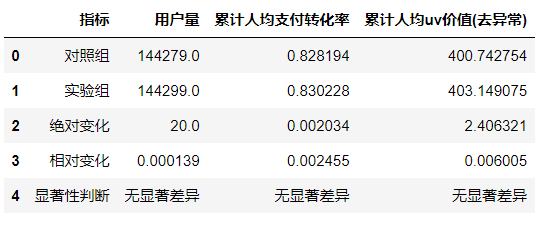

# 3、趋势性分析

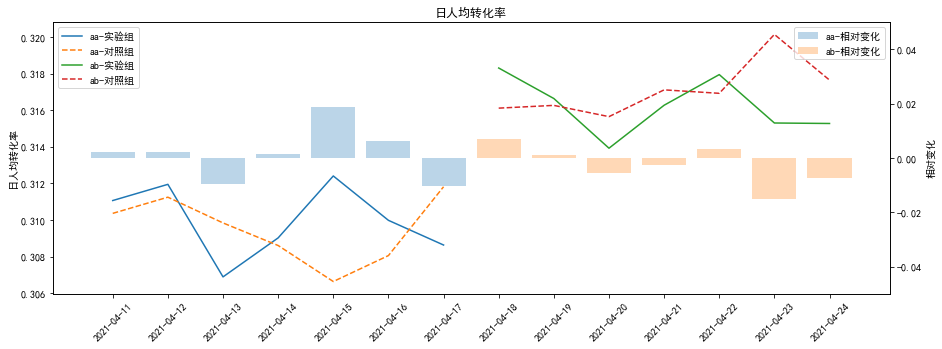

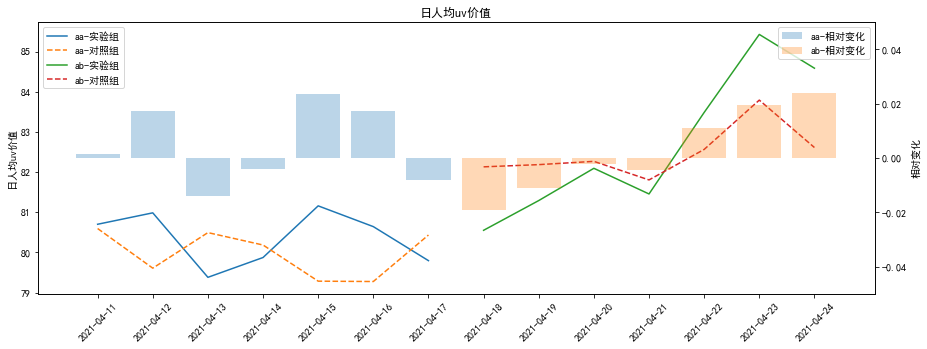

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as ss
plt.rcParams["axes.unicode_minus"] = False #解决坐标轴刻度负号乱码
plt.rcParams["font.sans-serif"] = ["Simhei"] #解决中文乱码

## 2、AA测试

In [19]:
aa = pd.read_csv('C:/Users/zhouz/Desktop/python_project/ABtest/淘宝首页增加订阅功能/aa_data_7d.csv', encoding='utf8')

In [20]:
aa

,uid,dt,con_treat,page,is_converte,order_amt
0,630002,2021-04-11,control,old_page,0,0.00
1,630008,2021-04-11,control,old_page,1,451.77
2,630011,2021-04-11,control,old_page,1,52.84
3,630015,2021-04-11,control,old_page,0,0.00
4,630032,2021-04-11,control,old_page,1,22.25
...,...,...,...,...,...,...
1455560,945983,2021-04-17,treatment,new_page,1,175.23
1455561,945986,2021-04-17,treatment,new_page,1,144.64
1455562,945987,2021-04-17,treatment,new_page,0,0.00
1455563,945996,2021-04-17,treatment,new_page,0,0.00


+ uid：用户ID
+ dt：访问首页日期
+ con_treat：control表示对照组，treatment表示实验组
+ page：表示新老页面，new_page表示新页面，old_page表示老页面
+ is_converte：表示当日是否转化，1表示转化，0表示未转化
+ order_amt：当日购买成交的总金额


### 初次探索aa数据

In [21]:
aa_uid = aa.groupby(['uid']).agg({'con_treat':'max','is_converte':'max','order_amt':'sum'}).reset_index()

In [22]:
aa_uid

,uid,con_treat,is_converte,order_amt
0,630000,treatment,1,1388.30
1,630001,treatment,1,736.70
2,630002,control,0,0.00
3,630003,treatment,1,799.96
4,630004,treatment,1,1065.60
...,...,...,...,...
288573,945994,control,1,294.86
288574,945996,treatment,1,244.46
288575,945997,control,1,174.56
288576,945998,control,1,508.45


异常值处理

In [23]:
aa_uid.describe(percentiles=[0.8,0.85,0.9,0.95,0.99]).T

,count,mean,std,min,50%,80%,85%,90%,95%,99%,max
uid,288578.0,788015.993080,91233.945005,630000.0,788017.500,882845.600,898688.45,914481.600,930226.150,942821.2300,945999.0
is_converte,288578.0,0.829211,0.376325,0.0,1.000,1.000,1.00,1.000,1.000,1.0000,1.0
order_amt,288578.0,439.115624,9420.627657,0.0,280.735,703.166,824.79,990.226,1260.543,1856.5584,2845817.3


In [24]:
aa_uid.loc[aa_uid['order_amt']>=2000]

,uid,con_treat,is_converte,order_amt
315,630360,treatment,1,2191.72
333,630380,control,1,3486.55
461,630518,treatment,1,2390.23
704,630783,control,1,2425.36
948,631055,treatment,1,2531.08
...,...,...,...,...
287601,944922,treatment,1,2503.70
288004,945367,treatment,1,2136.73
288106,945481,control,1,2186.67
288329,945724,treatment,1,2379.21


In [25]:
aa_uid['order_amt_v']=aa_uid['order_amt'].apply(lambda x:2000 if x>2000 else x)
aa_uid.describe()

,uid,is_converte,order_amt,order_amt_v
count,288578.000000,288578.000000,2.885780e+05,288578.000000
mean,788015.993080,0.829211,4.391156e+02,401.945998
std,91233.945005,0.376325,9.420628e+03,419.659834
min,630000.000000,0.000000,0.000000e+00,0.000000
25%,709042.250000,1.000000,6.189250e+01,61.892500
50%,788017.500000,1.000000,2.807350e+02,280.735000
75%,866975.750000,1.000000,6.070575e+02,607.057500
max,945999.000000,1.000000,2.845817e+06,2000.000000


分组统计

In [26]:
aa_res=aa_uid.groupby('con_treat').agg({'uid':'count','is_converte':'sum',\
                                'order_amt':['sum','mean','std'],'order_amt_v':['sum','mean','std']}).reset_index()
aa_res.columns = aa_res.columns.to_flat_index()
aa_res = aa_res.rename(columns={('con_treat',''):'con_treat', 
                                ('uid','count'):'uv', 
                                ('is_converte','sum'):'convert_sum', 
                                ('order_amt','sum'):'order_amt_sum',
                                ('order_amt','mean'):'order_amt_mean',
                                ('order_amt','std'):'order_amt_std',
                                ('order_amt_v','std'):'order_amt_v_std',
                                ('order_amt_v','mean'):'order_amt_v_mean', 
                                ('order_amt_v','sum'):'order_amt_v_sum'})

aa_res

,con_treat,uv,convert_sum,order_amt_sum,order_amt_mean,order_amt_std,order_amt_v_sum,order_amt_v_mean,order_amt_v_std
0,control,144279,119491,5.817160e+07,403.188276,430.507624,5.781876e+07,400.742754,419.327881
1,treatment,144299,119801,6.854751e+07,475.037992,13315.287195,5.817401e+07,403.149075,419.989486


#### 分流校验（比例样本抽样）

+ H0: 实验组、对照组人数大致相等，实验组人数占总体人数的比例 = 0.5  

+ H1: 实验组人数占总体人数的比例 <> 0.5  


In [27]:
test_uv = aa_res.loc[aa_res['con_treat'] == 'treatment','uv'].values
con_uv = aa_res.loc[aa_res['con_treat'] == 'control','uv'].values
test_rate = 0.5
test_ture_rate = test_uv/(test_uv+con_uv)
z =(test_ture_rate-test_rate)/np.sqrt(test_rate*(1-test_rate)/(test_uv +con_uv))
p=2*(1-ss.norm.cdf(abs(z)))
print('z值=%f'%z)
print('p值=%f'%p)
a=0.05
z_critical=ss.norm.ppf(1-a/2)
print('拒绝H0：'if abs(z)>z_critical else '接受H0')

z值=0.037230
p值=0.970301
接受H0


#### 同质性校验-累计人均支付转化率

+ H0: 实验组、对照组累计人均支付转化率大致相等 实验组累计人均支付转化率 = 对照组累计人均支付转化率

+ H1: 实验组累计人均支付转化率 <> 对照组累计人均支付转化率


In [28]:
aa_res['convert_rate'] = aa_res['convert_sum']/aa_res['uv']
con_convert_rate=aa_res.loc[aa_res['con_treat'] == 'control','convert_rate'].values
test_convert_rate=aa_res.loc[aa_res['con_treat'] == 'treatment','convert_rate'].values

z =(test_convert_rate-con_convert_rate)/np.sqrt(test_convert_rate*(1-test_convert_rate)/test_uv+
                                                con_convert_rate*(1-con_convert_rate)/con_uv)
p=2*(1-ss.norm.cdf(abs(z)))
print('z值=%f'%z)
print('p值=%f'%p)
a=0.05
z_critical=ss.norm.ppf(1-a/2)
print('拒绝H0：'if abs(z)>z_critical else '接受H0')

z值=1.451412
p值=0.146665
接受H0


#### 同质性校验-累计人均gmv（uv价值）去异常

+ H0: 实验组、对照组累计人均gmv大致相等 实验组累计人均gmv = 对照组累计人均gmv

+ H1: 实验组累计人均gmv <> 对照组累计人均gmv


In [34]:
con_gmv_mean=aa_res.loc[aa_res['con_treat'] == 'control','order_amt_v_mean'].values
test_gmv_mean=aa_res.loc[aa_res['con_treat'] == 'treatment','order_amt_v_mean'].values

con_gmv_std=aa_res.loc[aa_res['con_treat'] == 'control','order_amt_v_std'].values
test_gmv_std=aa_res.loc[aa_res['con_treat'] == 'treatment','order_amt_v_std'].values
z =(test_gmv_mean-con_gmv_mean)/np.sqrt(test_gmv_std*test_gmv_std/test_uv + con_gmv_std*con_gmv_std/con_uv)
p=2*(1-ss.norm.cdf(abs(z)))
print('z值=%f'%z)
print('p值=%f'%p)
a=0.05
z_critical=ss.norm.ppf(1-a/2)
print('拒绝H0：'if abs(z)>z_critical else '接受H0')

z值=1.540135
p值=0.123527
接受H0


#### 同质性校验-累计人均gmv（uv价值）未去异常

+ H0: 实验组、对照组累计人均gmv大致相等 实验组累计人均gmv = 对照组累计人均gmv

+ H1: 实验组累计人均gmv <> 对照组累计人均gmv

In [35]:
con_gmv_mean=aa_res.loc[aa_res['con_treat'] == 'control','order_amt_mean'].values
test_gmv_mean=aa_res.loc[aa_res['con_treat'] == 'treatment','order_amt_mean'].values

con_gmv_std=aa_res.loc[aa_res['con_treat'] == 'control','order_amt_std'].values
test_gmv_std=aa_res.loc[aa_res['con_treat'] == 'treatment','order_amt_std'].values
z =(test_gmv_mean-con_gmv_mean)/np.sqrt(test_gmv_std*test_gmv_std/test_uv + con_gmv_std*con_gmv_std/con_uv)
p=2*(1-ss.norm.cdf(abs(z)))
print('z值=%f'%z)
print('p值=%f'%p)
a=0.05
z_critical=ss.norm.ppf(1-a/2)
print('拒绝H0：'if abs(z)>z_critical else '接受H0')

z值=2.048704
p值=0.040491
拒绝H0：


### AA 第一类错误预估

In [36]:
def aa_p_val(aa_uid):
    tmp_aa = aa_uid.copy()
    tmp_aa['is_test'] = tmp_aa['uid'].apply(lambda x: np.random.randint(0,2))

    tmp_aa_res = tmp_aa.groupby('is_test').agg({'uid':'count','is_converte':'sum',\
                                'order_amt':['sum','mean','std'],'order_amt_v':['sum','mean','std']}).reset_index()

    tmp_aa_res.columns = tmp_aa_res.columns.to_flat_index()
    tmp_aa_res = tmp_aa_res.rename(columns={('is_test',''):'is_test',
                                            ('uid','count'):'uv', 
                                            ('is_converte','sum'):'convert_sum',
                                            ('order_amt','sum'):'order_amt_sum',
                                            ('order_amt','mean'):'order_amt_mean',
                                            ('order_amt','std'):'order_amt_std',
                                            ('order_amt_v','std'):'order_amt_v_std',
                                            ('order_amt_v','mean'):'order_amt_v_mean',
                                            ('order_amt_v','sum'):'order_amt_v_sum'})



    ##分流校验
    test_uv = tmp_aa_res.loc[tmp_aa_res['is_test'] == 1,'uv'].values
    con_uv = tmp_aa_res.loc[tmp_aa_res['is_test'] == 0,'uv'].values
    test_rate = 0.5
    test_ture_rate = test_uv/(test_uv+con_uv)
    z1 =(test_ture_rate-test_rate)/np.sqrt(test_rate*(1-test_rate)/(test_uv + con_uv))
   
    p1=2*(1-ss.norm.cdf(abs(z1)))

    ##转化率
    tmp_aa_res['convert_rate'] = tmp_aa_res['convert_sum']/tmp_aa_res['uv']
    test_convert_rate=tmp_aa_res.loc[tmp_aa_res['is_test'] == 1,'convert_rate'].values
    con_convert_rate=tmp_aa_res.loc[tmp_aa_res['is_test'] == 0,'convert_rate'].values
    z2 =(test_convert_rate-con_convert_rate)/np.sqrt(test_convert_rate*(1-test_convert_rate)/test_uv 
                                                     + con_convert_rate*(1-con_convert_rate)/con_uv)
    
    p2=2*(1-ss.norm.cdf(abs(z2)))

    ##uv价值（去异常）
    test_gmv_mean=tmp_aa_res.loc[tmp_aa_res['is_test'] == 1,'order_amt_v_mean'].values
    con_gmv_mean=tmp_aa_res.loc[tmp_aa_res['is_test'] == 0,'order_amt_v_mean'].values

    test_gmv_std=tmp_aa_res.loc[tmp_aa_res['is_test'] == 1,'order_amt_v_std'].values
    con_gmv_std=tmp_aa_res.loc[tmp_aa_res['is_test'] == 0,'order_amt_v_std'].values

    z3 = (test_gmv_mean-con_gmv_mean)/np.sqrt(test_gmv_std*test_gmv_std/test_uv + con_gmv_std*con_gmv_std/con_uv)
    p3 = 2*(1-ss.norm.cdf(abs(z3)))

    ##uv价值（未去异常）
    test_gmv_mean=tmp_aa_res.loc[tmp_aa_res['is_test'] == 1,'order_amt_mean'].values
    con_gmv_mean=tmp_aa_res.loc[tmp_aa_res['is_test'] == 0,'order_amt_mean'].values

    test_gmv_std=tmp_aa_res.loc[tmp_aa_res['is_test'] == 1,'order_amt_std'].values
    con_gmv_std=tmp_aa_res.loc[tmp_aa_res['is_test'] == 0,'order_amt_std'].values

    z4 = (test_gmv_mean-con_gmv_mean)/np.sqrt(test_gmv_std*test_gmv_std/test_uv + con_gmv_std*con_gmv_std/con_uv)
    p4 = 2*(1-ss.norm.cdf(abs(z4)))

    return p1, p2, p3, p4

In [37]:
def repeat(repeat_num):
    p_df1=pd.DataFrame()
    for i in np.arange(repeat_num):
        p_df2= pd.DataFrame()
        p1, p2, p3, p4 = aa_p_val(aa_uid)
        p_df2['p1_value']=p1.round(2)
        p_df2['p2_value']=p2.round(2)
        p_df2['p3_value']=p3.round(2)
        p_df2['p4_value']=p4.round(2)
        p_df1= p_df1.append(p_df2)
        p_df1.reset_index()
    return p_df1

In [38]:
p_df_100=repeat(100)
p_df_100

,p1_value,p2_value,p3_value,p4_value
0,0.47,0.02,0.58,0.24
0,0.38,0.98,0.38,0.98
0,0.51,0.77,0.84,0.05
0,0.71,0.40,0.97,0.95
0,0.97,0.75,0.48,0.05
...,...,...,...,...
0,0.37,0.99,0.36,0.39
0,0.93,0.55,0.15,0.04
0,0.93,0.75,0.24,0.98
0,1.00,0.77,0.16,0.97


In [39]:
p_df_1000=repeat(1000)

In [40]:
p_df_10000=repeat(10000)

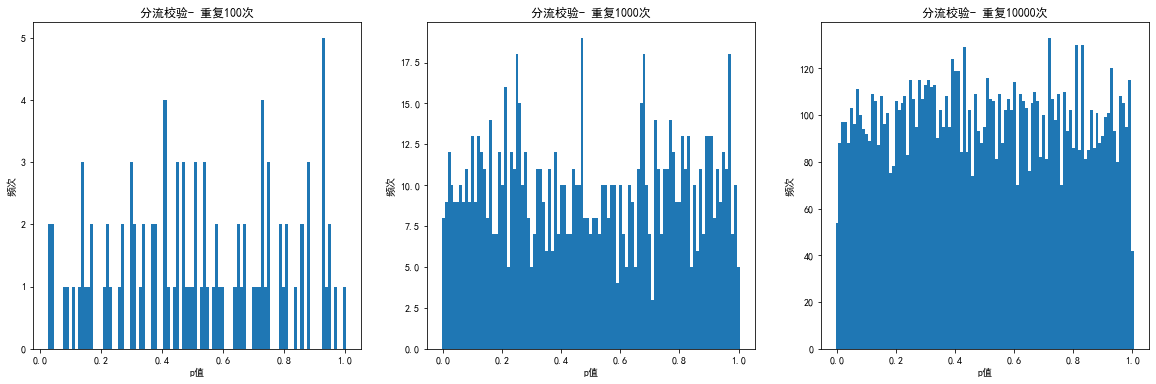

In [41]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
def plt_bar(i,data,col1,col2):
    ax[i].bar(data[col1].value_counts().index,data[col1].value_counts(),width=0.01)
    ax[i].set_xlabel('p值')
    ax[i].set_ylabel('频次')
    ax[i].set_title(col2)
plt_bar(0,p_df_100,'p1_value','分流校验- 重复100次')
plt_bar(1,p_df_1000,'p1_value','分流校验- 重复1000次')
plt_bar(2,p_df_10000,'p1_value','分流校验- 重复10000次')

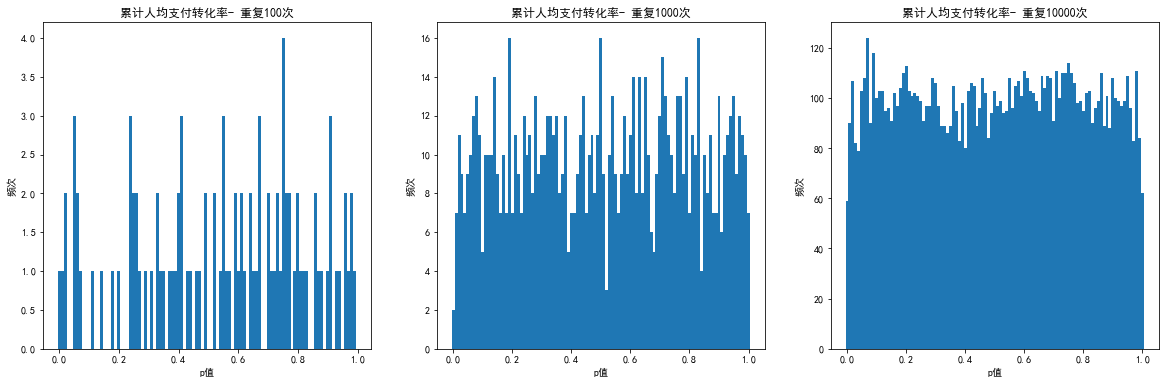

In [42]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
plt_bar(0,p_df_100,'p2_value','累计人均支付转化率- 重复100次')
plt_bar(1,p_df_1000,'p2_value','累计人均支付转化率- 重复1000次')
plt_bar(2,p_df_10000,'p2_value','累计人均支付转化率- 重复10000次')

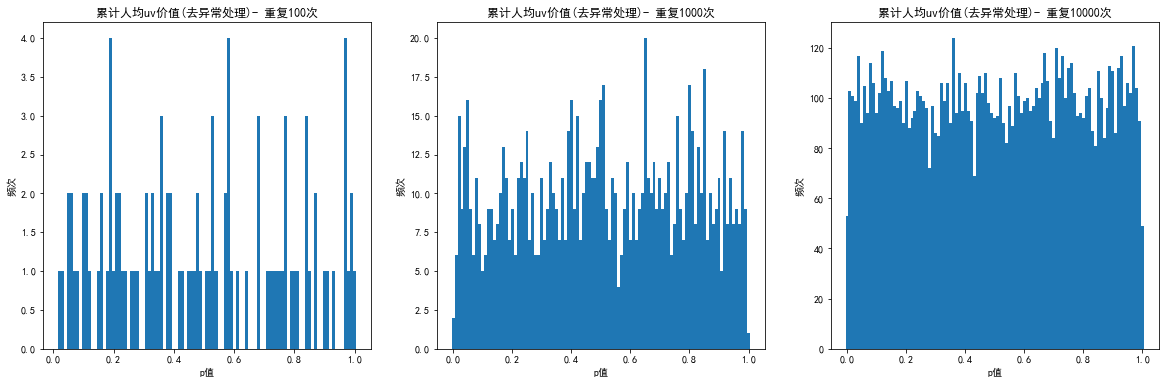

In [43]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
plt_bar(0,p_df_100,'p3_value','累计人均uv价值(去异常处理)- 重复100次')
plt_bar(1,p_df_1000,'p3_value','累计人均uv价值(去异常处理)- 重复1000次')
plt_bar(2,p_df_10000,'p3_value','累计人均uv价值(去异常处理)- 重复10000次')

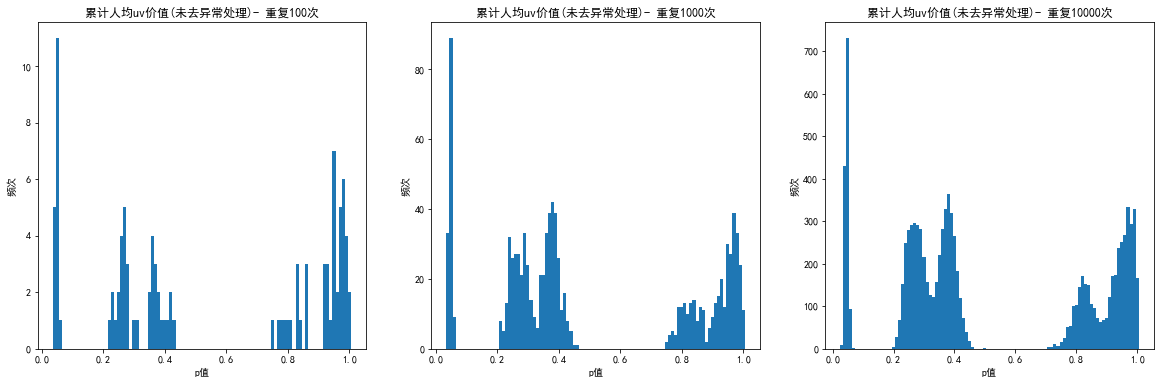

In [44]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
plt_bar(0,p_df_100,'p4_value','累计人均uv价值(未去异常处理)- 重复100次')
plt_bar(1,p_df_1000,'p4_value','累计人均uv价值(未去异常处理)- 重复1000次')
plt_bar(2,p_df_10000,'p4_value','累计人均uv价值(未去异常处理)- 重复10000次')

In [53]:
aa_err = pd.DataFrame(columns=['第一类错误-指标','重复100次','重复1000次','重复10000次'])

for j in np.arange(4):
    aa_err1=pd.DataFrame()
    aa_err1['重复100次']=[(p_df_100.iloc[:,j]<0.05).mean()]
    aa_err1['重复1000次']=[(p_df_1000.iloc[:,j]<0.05).mean()]
    aa_err1['重复10000次']=[(p_df_10000.iloc[:,j]<0.05).mean()]
    aa_err=aa_err.append(aa_err1)  
aa_err['第一类错误-指标']=['实验分流p1','累计人均支付转化率p2','累计人均uv价值(去异常)p3','累计人均uv价值(不去异常)p4']
aa_err

,第一类错误-指标,重复100次,重复1000次,重复10000次
0,实验分流p1,0.04,0.048,0.0424
0,累计人均支付转化率p2,0.04,0.036,0.0417
0,累计人均uv价值(去异常)p3,0.02,0.045,0.0473
0,累计人均uv价值(不去异常)p4,0.05,0.033,0.0439


#### 波动评估

In [57]:
aa_compare = aa_res[['con_treat','uv','convert_rate','order_amt_v_mean']].rename(columns={'con_treat':'指标','uv':'用户量','convert_rate':'累计人均支付转化率','order_amt_v_mean':'累计人均uv价值(去异常)'}).copy()
aa_compare['指标'] = aa_compare['指标'].apply(lambda x: '实验组' if x=='treatment' else '对照组')
aa_compare.loc[2,'指标'] = '绝对变化'
aa_compare.loc[2,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']]=aa_compare.loc[1,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']] - aa_compare.loc[0,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']]
aa_compare.loc[3,'指标'] = '相对变化'
aa_compare.loc[3,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']] = (aa_compare.loc[1,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']] - aa_compare.loc[0,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']])/aa_compare.loc[0,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']]
aa_compare.loc[4,'指标'] = '显著性判断'
aa_compare.loc[4,['用户量']] = '无显著差异'
aa_compare.loc[4,['累计人均支付转化率']] = '无显著差异'
aa_compare.loc[4,['累计人均uv价值(去异常)']] = '无显著差异'

aa_compare

,指标,用户量,累计人均支付转化率,累计人均uv价值(去异常)
0,对照组,144279.0,0.828194,400.742754
1,实验组,144299.0,0.830228,403.149075
2,绝对变化,20.0,0.002034,2.406321
3,相对变化,0.000139,0.002455,0.006005
4,显著性判断,无显著差异,无显著差异,无显著差异


综上，AA测试成立，可以进行AB测试

## 3、AB测试

In [58]:
ab = pd.read_csv('C:/Users/zhouz/Desktop/python_project/ABtest/淘宝首页增加订阅功能/ab_data_7d.csv', encoding='utf8')

In [59]:
ab.head()

,uid,dt,con_treat,page,is_converte,order_amt
0,630002,2021-04-18,control,old_page,0,0.00
1,630009,2021-04-18,control,old_page,0,0.00
2,630011,2021-04-18,control,old_page,1,581.48
3,630013,2021-04-18,control,old_page,0,0.00
4,630015,2021-04-18,control,old_page,1,20.98


In [60]:
ab_uid = ab.groupby(['uid']).agg({'con_treat':'max','is_converte':'max','order_amt':'sum'}).reset_index()

In [61]:
ab_uid.describe(percentiles=[0.8,0.85,0.9,0.95,0.99]).T

ab_uid['order_amt_v']=ab_uid['order_amt'].apply(lambda x:2000 if x>2000 else x)
ab_uid.describe()
ab_res=ab_uid.groupby('con_treat').agg({'uid':'count','is_converte':'sum',\
                                'order_amt':['sum','mean','std'],'order_amt_v':['sum','mean','std']}).reset_index()
ab_res.columns = ab_res.columns.to_flat_index()
ab_res = ab_res.rename(columns={('con_treat',''):'con_treat', 
                                ('uid','count'):'uv', 
                                ('is_converte','sum'):'convert_sum', 
                                ('order_amt','sum'):'order_amt_sum',
                                ('order_amt','mean'):'order_amt_mean',
                                ('order_amt','std'):'order_amt_std',
                                ('order_amt_v','std'):'order_amt_v_std',
                                ('order_amt_v','mean'):'order_amt_v_mean', 
                                ('order_amt_v','sum'):'order_amt_v_sum'})


ab_res

,con_treat,uv,convert_sum,order_amt_sum,order_amt_mean,order_amt_std,order_amt_v_sum,order_amt_v_mean,order_amt_v_std
0,control,144285,120850,5.998930e+07,415.769474,437.351301,5.963120e+07,413.287594,426.194959
1,treatment,144305,120579,7.074145e+07,490.221740,13909.865730,5.987777e+07,414.938977,427.599471


#### ab测试-分流校验

+ H0: 实验组、对照组人数大致相等，实验组人数占总体人数的比例 = 0.5

+ H1: 实验组人数占总体人数的比例 <> 0.5

In [62]:
test_uv = ab_res.loc[ab_res['con_treat'] == 'treatment','uv'].values
con_uv = ab_res.loc[ab_res['con_treat'] == 'control','uv'].values
test_rate = 0.5
test_ture_rate = test_uv/(test_uv+con_uv)
z =(test_ture_rate-test_rate)/np.sqrt(test_rate*(1-test_rate)/(test_uv +con_uv))
p=2*(1-ss.norm.cdf(abs(z)))
print('z值=%f'%z)
print('p值=%f'%p)
a=0.05
z_critical=ss.norm.ppf(1-a/2)
print('拒绝H0：'if abs(z)>z_critical else '接受H0')

z值=0.037230
p值=0.970302
接受H0


#### ab测试-累计人均支付转化率校验

+ H0: 实验组、对照组累计人均支付转化率大致相等 实验组累计人均支付转化率 = 对照组累计人均支付转化率

+ H1: 实验组累计人均支付转化率 <> 对照组累计人均支付转化率

In [63]:
ab_res['convert_rate'] = ab_res['convert_sum']/ab_res['uv']
con_convert_rate=ab_res.loc[ab_res['con_treat'] == 'control','convert_rate'].values
test_convert_rate=ab_res.loc[ab_res['con_treat'] == 'treatment','convert_rate'].values

z =(test_convert_rate-con_convert_rate)/np.sqrt(test_convert_rate*(1-test_convert_rate)/test_uv
                                                + con_convert_rate*(1-con_convert_rate)/con_uv)
p=2*(1-ss.norm.cdf(abs(z)))
print('z值=%f'%z)
print('p值=%f'%p)
a=0.05
z_critical=ss.norm.ppf(1-a/2)
print('拒绝H0：'if abs(z)>z_critical else '接受H0')

z值=-1.448584
p值=0.147454
接受H0


#### ab测试-累计人均uv价值校验

+ H0: 实验组、对照组累计人均uv价值大致相等 实验组累计人均uv价值 = 对照组累计人均uv价值

+ H1: 实验组累计人均uv价值 <> 对照组累计人均uv价值

In [68]:
con_gmv_mean=aa_res.loc[aa_res['con_treat'] == 'control','order_amt_v_mean'].values
test_gmv_mean=aa_res.loc[aa_res['con_treat'] == 'treatment','order_amt_v_mean'].values

con_gmv_std=aa_res.loc[aa_res['con_treat'] == 'control','order_amt_v_std'].values
test_gmv_std=aa_res.loc[aa_res['con_treat'] == 'treatment','order_amt_v_std'].values
z =(test_gmv_mean-con_gmv_mean)/np.sqrt(test_gmv_std*test_gmv_std/test_uv + con_gmv_std*con_gmv_std/con_uv)
p=2*(1-ss.norm.cdf(abs(z)))
print('z值=%f'%z)
print('p值=%f'%p)
a=0.05
z_critical=ss.norm.ppf(1-a/2)
print('拒绝H0：'if abs(z)>z_critical else '接受H0')

z值=1.540167
p值=0.123520
接受H0


In [69]:
ab_res

,con_treat,uv,convert_sum,order_amt_sum,order_amt_mean,order_amt_std,order_amt_v_sum,order_amt_v_mean,order_amt_v_std,convert_rate
0,control,144285,120850,5.998930e+07,415.769474,437.351301,5.963120e+07,413.287594,426.194959,0.837578
1,treatment,144305,120579,7.074145e+07,490.221740,13909.865730,5.987777e+07,414.938977,427.599471,0.835584


In [70]:
ab_compare = ab_res[['con_treat','uv','convert_rate','order_amt_v_mean']].rename(columns={'con_treat':'指标','uv':'用户量','convert_rate':'累计人均支付转化率','order_amt_v_mean':'累计人均uv价值(去异常)'}).copy()
ab_compare['指标'] = ab_compare['指标'].apply(lambda x: '实验组' if x=='treatment' else '对照组')
ab_compare.loc[2,'指标'] = '绝对变化'
ab_compare.loc[2,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']]=ab_compare.loc[1,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']] - ab_compare.loc[0,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']]
ab_compare.loc[3,'指标'] = '相对变化'
ab_compare.loc[3,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']] = (ab_compare.loc[1,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']] - ab_compare.loc[0,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']])/ab_compare.loc[0,['用户量','累计人均支付转化率','累计人均uv价值(去异常)']]
ab_compare.loc[4,'指标'] = '显著性判断'
ab_compare.loc[4,['用户量']] = '无显著差异'
ab_compare.loc[4,['累计人均支付转化率']] = '无显著差异'
ab_compare.loc[4,['累计人均uv价值(去异常)']] = '无显著差异'

ab_compare

,指标,用户量,累计人均支付转化率,累计人均uv价值(去异常)
0,对照组,144285.0,0.837578,413.287594
1,实验组,144305.0,0.835584,414.938977
2,绝对变化,20.0,-0.001994,1.651383
3,相对变化,0.000139,-0.002381,0.003996
4,显著性判断,无显著差异,无显著差异,无显著差异


综上，本次ab实验，实验组与对照组无显著差异

## 4、趋势性分析

In [71]:
aa['order_amt_v']=aa['order_amt'].apply(lambda x: 2000 if x>2000 else x)
aa_dt = aa.groupby(['con_treat','dt']).agg({'uid':'count','page':'count','is_converte':'sum','order_amt':'sum','order_amt_v':'sum'}).reset_index()
aa_dt['人均uv价值'] = aa_dt['order_amt_v']/aa_dt['uid']
aa_dt['人均转化率'] = aa_dt['is_converte']/aa_dt['uid']
aa_dt_test=aa_dt.loc[aa_dt['con_treat']=='treatment',['dt','人均uv价值','人均转化率']]
aa_dt_test=aa_dt_test.rename(columns={'dt':'dt','人均uv价值':'实验组_人均uv价值','人均转化率':'实验组_人均转化率'})

aa_dt_con=aa_dt.loc[aa_dt['con_treat']=='control',['dt','人均uv价值','人均转化率']]
aa_dt_con=aa_dt_con.rename(columns={'dt':'dt','人均uv价值':'对照组_人均uv价值','人均转化率':'对照组_人均转化率'})

t_aa_dt = pd.merge(aa_dt_test,aa_dt_con,on='dt',how='left')
t_aa_dt['人均uv价值_相对变化']=(t_aa_dt['实验组_人均uv价值']-t_aa_dt['对照组_人均uv价值'])/t_aa_dt['对照组_人均uv价值']
t_aa_dt['人均转化率_相对变化']=(t_aa_dt['实验组_人均转化率']-t_aa_dt['对照组_人均转化率'])/t_aa_dt['对照组_人均转化率']

In [72]:
t_aa_dt

,dt,实验组_人均uv价值,实验组_人均转化率,对照组_人均uv价值,对照组_人均转化率,人均uv价值_相对变化,人均转化率_相对变化
0,2021-04-11,80.656082,0.311064,80.541806,0.310363,0.001419,0.002261
1,2021-04-12,80.940812,0.311950,79.576802,0.311248,0.017141,0.002257
2,2021-04-13,79.337272,0.306889,80.450898,0.309840,-0.013842,-0.009523
3,2021-04-14,79.827098,0.309022,80.162515,0.308605,-0.004184,0.001354
4,2021-04-15,81.126758,0.312409,79.253266,0.306635,0.023639,0.018828
5,2021-04-16,80.576362,0.309982,79.253402,0.308054,0.016693,0.006258
6,2021-04-17,79.769955,0.308632,80.407937,0.311819,-0.007934,-0.010221


In [73]:
aa_dt

,con_treat,dt,uid,page,is_converte,order_amt,order_amt_v,人均uv价值,人均转化率
0,control,2021-04-11,103727,103727,32193,8359959.10,8354359.91,80.541806,0.310363
1,control,2021-04-12,100987,100987,31432,8039584.85,8036222.55,79.576802,0.311248
2,control,2021-04-13,100452,100452,31124,8085848.88,8081453.63,80.450898,0.309840
3,control,2021-04-14,101609,101609,31357,8147599.80,8145233.02,80.162515,0.308605
4,control,2021-04-15,103853,103853,31845,8234135.57,8230689.39,79.253266,0.306635
5,control,2021-04-16,104342,104342,32143,8271986.80,8269458.48,79.253402,0.308054
6,control,2021-04-17,112296,112296,35016,9032486.29,9029489.68,80.407937,0.311819
7,treatment,2021-04-11,103747,103747,32272,10478641.13,8367826.53,80.656082,0.311064
8,treatment,2021-04-12,101202,101202,31570,11036195.47,8191372.07,80.940812,0.311950
9,treatment,2021-04-13,100740,100740,30916,10731561.18,7992436.79,79.337272,0.306889


In [74]:
ab['order_amt_v']=ab['order_amt'].apply(lambda x: 2000 if x>2000 else x)
ab_dt = ab.groupby(['con_treat','dt']).agg({'uid':'count','page':'count','is_converte':'sum','order_amt':'sum','order_amt_v':'sum'}).reset_index()
ab_dt['人均uv价值'] = ab_dt['order_amt_v']/aa_dt['uid']
ab_dt['人均转化率'] = ab_dt['is_converte']/aa_dt['uid']
ab_dt_test=ab_dt.loc[aa_dt['con_treat']=='treatment',['dt','人均uv价值','人均转化率']]
ab_dt_test=ab_dt_test.rename(columns={'dt':'dt','人均uv价值':'实验组_人均uv价值','人均转化率':'实验组_人均转化率'})

ab_dt_con=ab_dt.loc[aa_dt['con_treat']=='control',['dt','人均uv价值','人均转化率']]
ab_dt_con=ab_dt_con.rename(columns={'dt':'dt','人均uv价值':'对照组_人均uv价值','人均转化率':'对照组_人均转化率'})

t_ab_dt = pd.merge(ab_dt_test,ab_dt_con,on='dt',how='left')
t_ab_dt['人均uv价值_相对变化']=(t_ab_dt['实验组_人均uv价值']-t_ab_dt['对照组_人均uv价值'])/t_ab_dt['对照组_人均uv价值']
t_ab_dt['人均转化率_相对变化']=(t_ab_dt['实验组_人均转化率']-t_ab_dt['对照组_人均转化率'])/t_ab_dt['对照组_人均转化率']

In [75]:
t_ab_dt

,dt,实验组_人均uv价值,实验组_人均转化率,对照组_人均uv价值,对照组_人均转化率,人均uv价值_相对变化,人均转化率_相对变化
0,2021-04-18,80.461264,0.318313,82.101583,0.316118,-0.019979,0.006942
1,2021-04-19,81.224857,0.316644,82.151538,0.316268,-0.011280,0.001187
2,2021-04-20,82.030118,0.313927,82.228442,0.315653,-0.002412,-0.005469
3,2021-04-21,81.429687,0.316276,81.766633,0.317118,-0.004121,-0.002653
4,2021-04-22,83.449774,0.317953,82.522644,0.316929,0.011235,0.003230
5,2021-04-23,85.375526,0.315305,83.766443,0.320149,0.019209,-0.015130
6,2021-04-24,84.563060,0.315279,82.560591,0.317652,0.024255,-0.007470


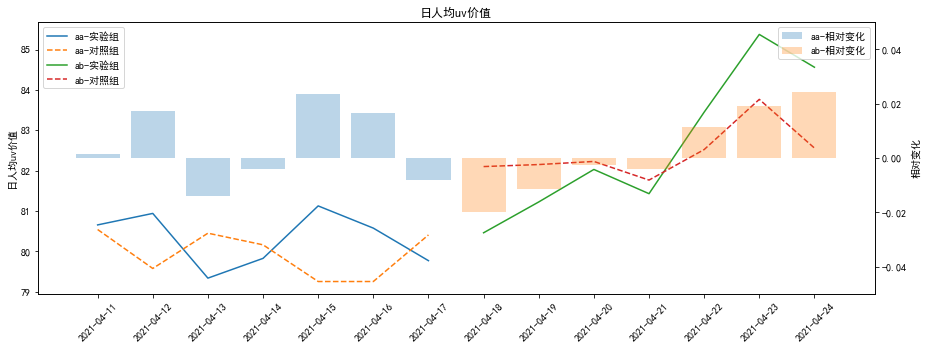

In [76]:
def plot(data1,data2,col1,col2,col3,col4):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    ax1.plot(data1['dt'],data1[col1],label='aa-实验组')
    ax1.plot(data1['dt'],data1[col2],label='aa-对照组',linestyle='--')
    ax1.plot(data2['dt'],data2[col1],label='ab-实验组')
    ax1.plot(data2['dt'],data2[col2],label='ab-对照组',linestyle='--')
    ax1.set_xticks(pd.concat([data1['dt'],data2['dt']]))
    ax1.set_xticklabels(pd.concat([data1['dt'],data2['dt']]),rotation=45)
    ax1.legend(loc='upper left')
    ax1.set_ylabel(col4)
    ax1.set_title(col4)
    
    ax2=ax1.twinx()
    ax2.bar(data1['dt'],data1[col3],alpha=0.3,label='aa-相对变化')
    ax2.bar(data2['dt'],data2[col3],alpha=0.3,label='ab-相对变化')
    ax2.set_ylim(-0.05, 0.05)
    ax2.set_ylabel('相对变化')
    ax2.legend(loc='upper right')
    plt.show()
plot(t_aa_dt,t_ab_dt,'实验组_人均uv价值','对照组_人均uv价值','人均uv价值_相对变化','日人均uv价值')

+ 日人均uv价值 = 每日总gmv/每日访问总人数
+ 实验开始前（2021-04-11 ~ 2021-04-17）日人均uv价值呈现波动
+ 实验开始后（2021-04-18 ~ 2021-04-24）前4天日人均uv价值呈现波动，第5天开始出现正向趋势，建议加长实验周期，再持续观察一周

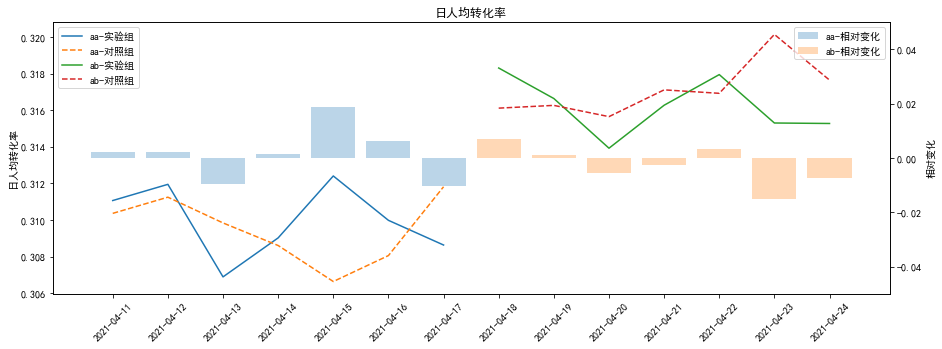

In [77]:
plot(t_aa_dt,t_ab_dt,'实验组_人均转化率','对照组_人均转化率','人均转化率_相对变化','日人均转化率')

+ 日人均支付转化率 = 每日支付用户数/每日访问总人数
+ 实验开始前（2021-04-11 ~ 2021-04-17）日人均支付转化率呈现波动
+ 实验开始后（2021-04-18 ~ 2021-04-24）日人均支付转化率呈现波动，无正向或负向趋势

In [11]:
data=pd.read_excel('C:/Users/zhouz/Desktop/adata.xlsx')
data.replace(0,np.nan,inplace=True)

In [12]:
data

,name,year,income,asset,dar,loan,rdf,rdp,profit,nasset
0,东旭光电,2016,6.901321e+05,4.682632e+06,50.7345,1.258685e+06,19116.713827,12.23,152521.871157,2.306922e+06
1,东旭光电,2017,1.733636e+06,6.768333e+06,52.6364,1.465880e+06,38573.104990,17.61,228089.947837,3.205726e+06
2,东旭光电,2018,2.821170e+06,7.257612e+06,53.9472,1.362599e+06,59604.420102,21.98,273783.162758,3.342334e+06
3,东旭光电,2019,1.752875e+06,6.776045e+06,53.4897,1.329966e+06,122538.223045,21.43,-127806.594790,3.151559e+06
4,东旭光电,2020,7.048746e+05,6.482923e+06,55.8631,1.302579e+06,30259.934542,18.52,-349164.871521,2.861361e+06
...,...,...,...,...,...,...,...,...,...,...
697,厦钨新能,2017,4.211442e+05,3.773804e+05,80.6660,NaN,17259.241163,NaN,23834.786093,7.296273e+04
698,厦钨新能,2018,7.026350e+05,5.549141e+05,85.3961,1.414431e+05,33234.481018,NaN,8405.789870,8.103910e+04
699,厦钨新能,2019,6.977724e+05,5.347981e+05,70.6841,1.975688e+05,24542.648756,13.98,11293.418421,1.567809e+05
700,厦钨新能,2020,7.989638e+05,6.221825e+05,70.9859,2.400464e+05,26118.395393,14.57,26269.039726,1.805207e+05


In [13]:
data.fillna(data.mean(),inplace=True)

In [14]:
data.isnull().sum()

name      0
year      0
income    0
asset     0
dar       0
loan      0
rdf       0
rdp       0
profit    0
nasset    0
dtype: int64

In [15]:
writer=pd.ExcelWriter('C:/Users/zhouz/Desktop/tab.xlsx')
data.to_excel(writer,'sheet1')
writer.save()

In [16]:
data

,name,year,income,asset,dar,loan,rdf,rdp,profit,nasset
0,东旭光电,2016,6.901321e+05,4.682632e+06,50.7345,1.258685e+06,19116.713827,12.230000,152521.871157,2.306922e+06
1,东旭光电,2017,1.733636e+06,6.768333e+06,52.6364,1.465880e+06,38573.104990,17.610000,228089.947837,3.205726e+06
2,东旭光电,2018,2.821170e+06,7.257612e+06,53.9472,1.362599e+06,59604.420102,21.980000,273783.162758,3.342334e+06
3,东旭光电,2019,1.752875e+06,6.776045e+06,53.4897,1.329966e+06,122538.223045,21.430000,-127806.594790,3.151559e+06
4,东旭光电,2020,7.048746e+05,6.482923e+06,55.8631,1.302579e+06,30259.934542,18.520000,-349164.871521,2.861361e+06
...,...,...,...,...,...,...,...,...,...,...
697,厦钨新能,2017,4.211442e+05,3.773804e+05,80.6660,3.597883e+05,17259.241163,14.892341,23834.786093,7.296273e+04
698,厦钨新能,2018,7.026350e+05,5.549141e+05,85.3961,1.414431e+05,33234.481018,14.892341,8405.789870,8.103910e+04
699,厦钨新能,2019,6.977724e+05,5.347981e+05,70.6841,1.975688e+05,24542.648756,13.980000,11293.418421,1.567809e+05
700,厦钨新能,2020,7.989638e+05,6.221825e+05,70.9859,2.400464e+05,26118.395393,14.570000,26269.039726,1.805207e+05


In [17]:
data.mean()

year      2.018500e+03
income    1.877054e+06
asset     2.486868e+06
dar       5.047771e+01
loan      3.597883e+05
rdf       6.637374e+04
rdp       1.489234e+01
profit    1.008748e+05
nasset    1.020629e+06
dtype: float64